In [ ]:
#içerisinde 7kategoriden 42k veri bulunan
#Turkish Headlines  veri setinden

# Haber başlıklarının içeriklerine göre kategrori
#tahmini yapmaya çalışmak

from google.colab import files

# Bilgisayarından dosya yükleme sağlar
uploaded = files.upload()



Saving TurkishHeadlines.csv to TurkishHeadlines.csv


In [ ]:
import pandas as pd

# Dosya adını doğru yazman önemli!
df = pd.read_csv("TurkishHeadlines.csv")

# İlk birkaç satırı göster
df.head()


,HABERLER,ETIKET
0,TÜİK verilerine göre sanayi ciro endeksi Ağust...,Ekonomi
1,Piyasa güne eksi rezervde başladı,Ekonomi
2,"Citigroup, Deutsche Bank ve HSBC Libor manipül...",Ekonomi
3,Gelişen piyasa yatırımcılarını en fazla 'Fed' ...,Ekonomi
4,Bitcoin fiyatında yükseliş hız kesmiyor,Ekonomi


In [ ]:
#Veri temizliği ve küçük harfe çevirme

import pandas as pd
import re
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score,classification_report

df = pd.read_csv("TurkishHeadlines.csv")
#dosyayı okuma


df.dropna(inplace=True)
#eksik veri varsa silme

def temizle(metin): #metindlerde yapılacak işlemlerin fonksiyonel hale getirimi

  metin = metin.lower()  #küçük harfe çevirme
  metin = re.sub(r'[^\w\s]', '',metin)#noktalama işareti kaldırma

  return metin


df["temiz_haberler"]= df["HABERLER"].apply(temizle)
#temizle fonksiyonun tüm veri setinde uygulanması

df[["HABERLER", "temiz_haberler","ETIKET"]].head()
#Kontrol için

,HABERLER,temiz_haberler,ETIKET
0,TÜİK verilerine göre sanayi ciro endeksi Ağust...,tüik verilerine göre sanayi ciro endeksi ağust...,Ekonomi
1,Piyasa güne eksi rezervde başladı,piyasa güne eksi rezervde başladı,Ekonomi
2,"Citigroup, Deutsche Bank ve HSBC Libor manipül...",citigroup deutsche bank ve hsbc libor manipüla...,Ekonomi
3,Gelişen piyasa yatırımcılarını en fazla 'Fed' ...,gelişen piyasa yatırımcılarını en fazla fed il...,Ekonomi
4,Bitcoin fiyatında yükseliş hız kesmiyor,bitcoin fiyatında yükseliş hız kesmiyor,Ekonomi


In [ ]:
#veri seti eksik veri olnlar silindi ve noktalama işaretleri kaldırılıp veirler
#lower case formatına getirildi

""" TF-IDF Vektörleme+Model Eğitimi"""

X=df["temiz_haberler"]
y=df["ETIKET"]

#girdi ve etikerleri ayarlama


tfidf = TfidfVectorizer()
X_tfidf= tfidf.fit_transform(X)
#TF-IDF vektörleme işlemi

X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size= 0.2,random_state=42)
#Eğitim ve test verisi ayrımı

model = MultinomialNB()
model.fit(X_train,y_train)
#naive bayes modeli kurulumu ve eğitimi

y_pred = model.predict(X_test)
#Test verisiyle tahmin


print("Doğruluk ORanı:",accuracy_score(y_test,y_pred))
print("\nSınıflandırma Raporu:\n",classification_report(y_test,y_pred))
#Doğruluk metrikleri

Doğruluk ORanı: 0.9547619047619048

Sınıflandırma Raporu:
               precision    recall  f1-score   support

     Ekonomi       0.98      0.86      0.92       147
     Magazin       0.98      0.98      0.98       118
      Sağlık       0.95      0.98      0.96       121
     Siyaset       0.95      0.98      0.97       115
        Spor       0.96      0.96      0.96       120
   Teknoloji       0.88      0.98      0.93       101
       Yaşam       0.97      0.97      0.97       118

    accuracy                           0.95       840
   macro avg       0.95      0.96      0.96       840
weighted avg       0.96      0.95      0.95       840



In [ ]:
!pip install wordcloud


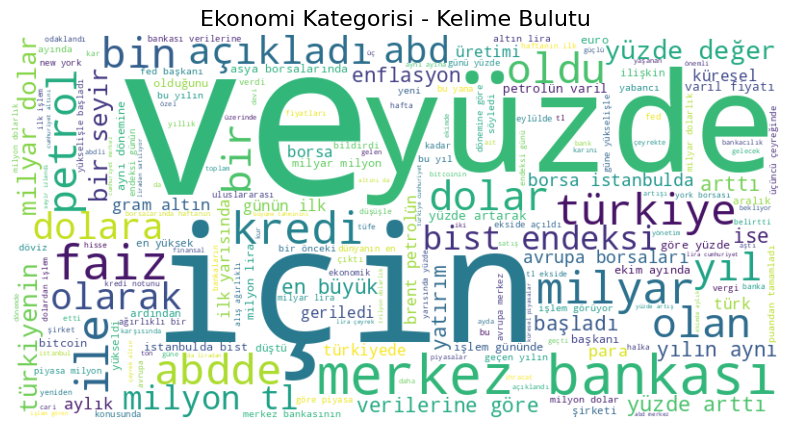

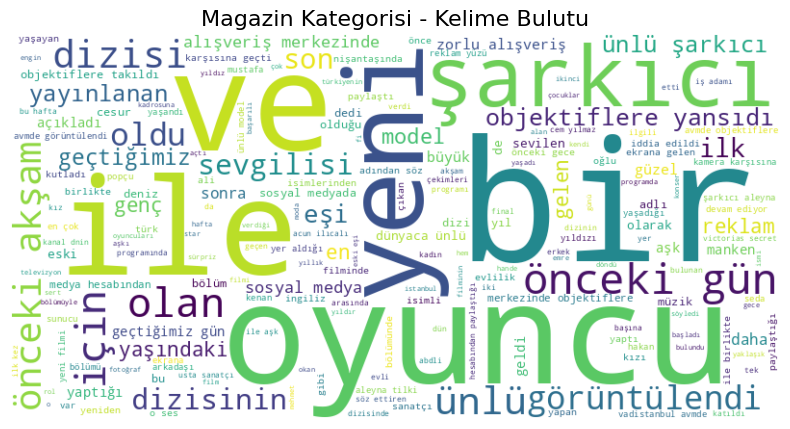

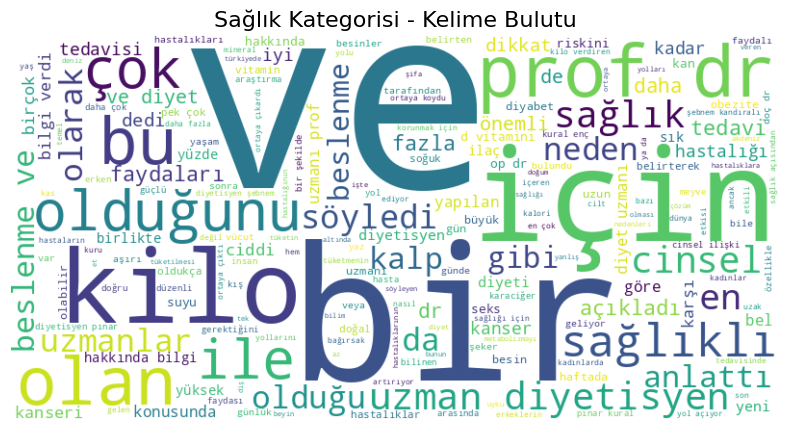

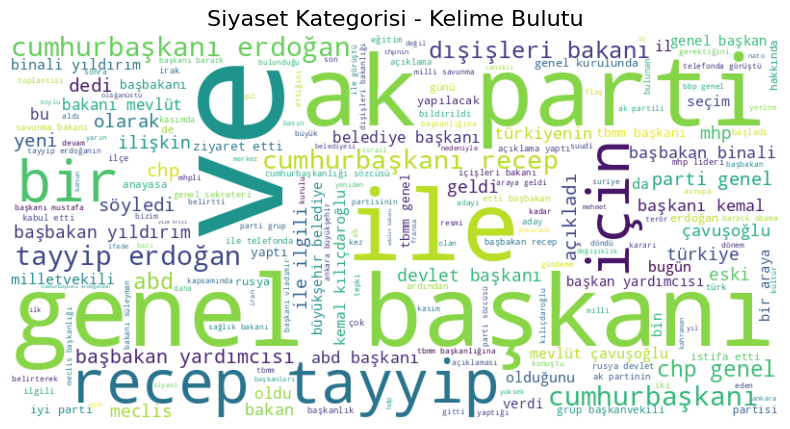

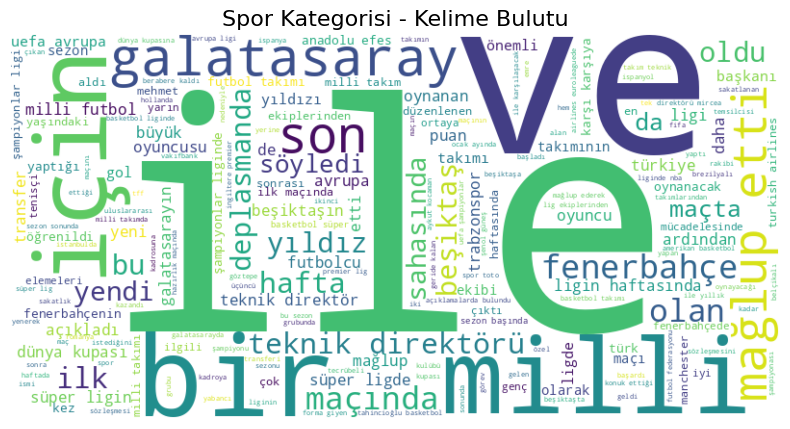

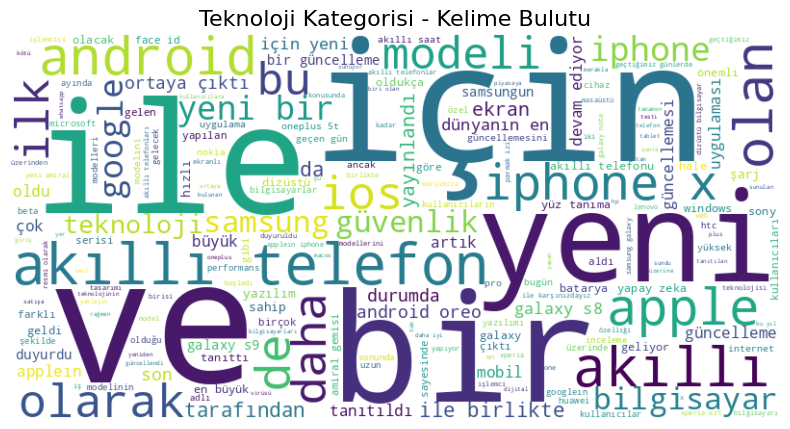

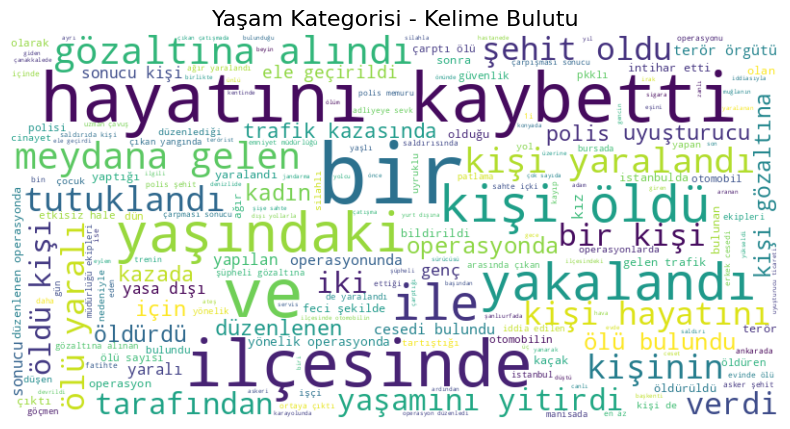

In [ ]:
#WordCloud Oluşturma

from wordcloud import WordCloud
import matplotlib.pyplot as plt

kategoriler= df["ETIKET"].unique()
#her kaategorideki başlıkları bilrşetirip wordcloud oluşturur


for kategori in kategoriler:

  basliklar = df[df["ETIKET"]==kategori]["temiz_haberler"]
  #Kategoriye ait başlıkların seçimi

  metin = " ".join(basliklar)
  #tüm başlıkları tek string haline getirme

  wordcloud = WordCloud(width=800, height=400, background_color='white').generate(metin)
  #wordcloud nensnesi türetme

  plt.figure(figsize=(10,5))
  plt.imshow(wordcloud,interpolation='bilinear')
  plt.axis('off')
  plt.title(f"{kategori} Kategorisi - Kelime Bulutu", fontsize=16)
  plt.show()

In [ ]:
"""
En çok tekrarlayan kelimeler

"""

In [ ]:
def temizle(metin):

  metin= metin.lower()
  metin = re.sub(r'[^\nw\s]', '',metin)

  return metin


# her başlığa gerekli temizlik ve işlemleri yapan temizle fonksiyonu


def kategori_tahmin_et(cumle):
  temiz = temizle(cumle)

  vektor=tfidf.transform([temiz])#TF-IDF vektörleme

  tahmin = model.predict(vektor)#tahmin yapma

  print(f"\n Girilen Başlık : {cumle}")
  print(f"Tahmin Edilen Kategori: {tahmin[0]}"
  )


kategori_tahmin_et("Fenerbahçe yeni transferini duyurdu.")
kategori_tahmin_et("Bitcoin fiyatı yükselişe geçti.")
kategori_tahmin_et("Bakanlık sağlık reformlarını açıkladı.")



 Girilen Başlık : Fenerbahçe yeni transferini duyurdu.
Tahmin Edilen Kategori: Teknoloji

 Girilen Başlık : Bitcoin fiyatı yükselişe geçti.
Tahmin Edilen Kategori: Teknoloji

 Girilen Başlık : Bakanlık sağlık reformlarını açıkladı.
Tahmin Edilen Kategori: Teknoloji


ETIKET
Ekonomi      600
Magazin      600
Sağlık       600
Siyaset      600
Spor         600
Teknoloji    600
Yaşam        600
Name: count, dtype: int64


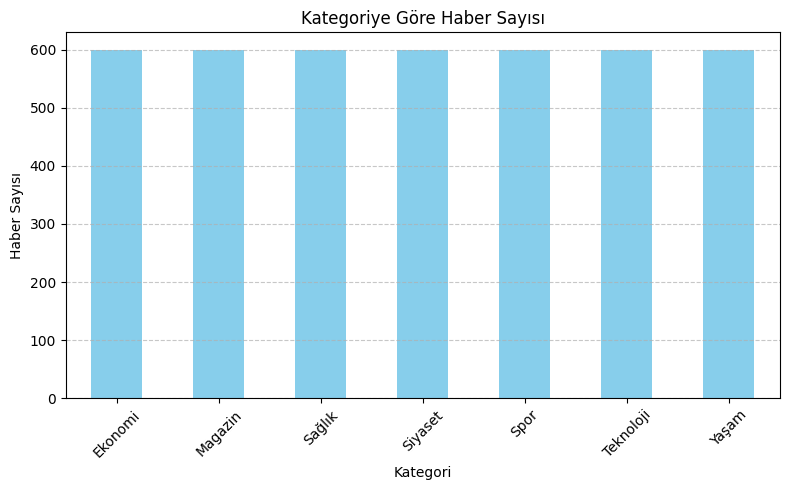

In [ ]:
# Kategorilere göre veri dağılımını say
kategori_sayilari = df["ETIKET"].value_counts()

# Yazdır
print(kategori_sayilari)

# İstersen grafikle de gösterebiliriz
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
kategori_sayilari.plot(kind="bar", color="skyblue")
plt.title("Kategoriye Göre Haber Sayısı")
plt.xlabel("Kategori")
plt.ylabel("Haber Sayısı")
plt.xticks(rotation=45)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.tight_layout()
plt.show()


In [ ]:
"""
veri seti gayet dağınık olmasına rağmen 3 tahminden sadece 1 ini doğru bilebildi

bunun sebebi kelime kelime bakması n-gram şeklinde sağlık reformu yeni transfer
gibi bakamaması bu şkeilde yaparak doğruluk oranını artırabiliriz
"""
#TF-IDF'i ngram_range=(1,2) ile güncelleyelim:
#Bu, hem tekli kelimelere hem de ikili kelime gruplarına bakmamızı sağlar.





'\nveri seti gayet dağınık olmasına rağmen 3 tahminden sadece 1 ini doğru bilebildi \n\nbunun sebebi kelime kelime bakması n-gram şeklinde sağlık reformu yeni transfer\ngibi bakamaması bu şkeilde yaparak doğruluk oranını artırabiliriz\n'

In [ ]:
# TF-IDF'yi unigram yerine bigram dahil olacak şekilde güncelliyoruz
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report



tfidf =TfidfVectorizer(ngram_range=(1,2))
#ngram_range bu şekilde hem tekli ikili jelime gruplaraına
#bakarak daha doğru tahmin yapbilir

X=tfidf.fit_transform(df["temiz_haberler"])
y= df["ETIKET"]
#temizlenmiş haberleri vektörelleştirme

X_train, X_test, y_train, y_test =train_test_split(X, y, test_size=0.2, random_state=42)
#eğitim ve test verisini ayırma

model=MultinomialNB()
model.fit(X_train, y_train)
#model tanımlama ve eğitme

y_pred = model.predict(X_test)

print("Yeni Model -N-Gram ile Eğitildi")
print("Doğruluk ORanı: ",accuracy_score(y_test, y_pred))
print("\nSınıflandırma Raporu:\n",classification_report(y_test, y_pred))

Yeni Model -N-Gram ile Eğitildi
Doğruluk ORanı:  0.9535714285714286

Sınıflandırma Raporu:
               precision    recall  f1-score   support

     Ekonomi       0.96      0.86      0.91       147
     Magazin       0.99      0.98      0.99       118
      Sağlık       0.96      0.96      0.96       121
     Siyaset       0.96      0.97      0.97       115
        Spor       0.97      0.97      0.97       120
   Teknoloji       0.87      0.98      0.92       101
       Yaşam       0.97      0.97      0.97       118

    accuracy                           0.95       840
   macro avg       0.95      0.96      0.95       840
weighted avg       0.96      0.95      0.95       840



In [ ]:
def kategori_tahmin_et():
    cumle = input("🔤 Haber başlığını giriniz: ")
    temiz = temizle(cumle)
    vektor = tfidf.transform([temiz])
    tahmin = model.predict(vektor)
    print(f"\n📌 Tahmin Edilen Kategori: {tahmin[0]}")

kategori_tahmin_et()


🔤 Haber başlığını giriniz: Fenerbahçe yeni transferini duyurdu.

📌 Tahmin Edilen Kategori: Teknoloji


In [ ]:
#Gene yanlış kodlandırdı
#veri seti yanlış mı öğreniyor diye fenerbahçe etiketini aratalım

# Fenerbahçe geçen tüm başlıkları ve kategorilerini görelim
fener = df[df["temiz_haberler"].str.contains("fenerbahçe")]
print(fener["ETIKET"].value_counts())


ETIKET
Spor    69
Name: count, dtype: int64


In [ ]:
# Eğitim verisini yeniden oluşturuyoruz
X = df["temiz_haberler"]
y = df["ETIKET"]

# TF-IDF + N-gram (önceki gibi)
tfidf = TfidfVectorizer(ngram_range=(1,2))
X_tfidf = tfidf.fit_transform(X)

# Eğitim ve test ayrımı (veri indislerini saklayarak!)
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test, idx_train, idx_test = train_test_split(
    X_tfidf, y, df.index, test_size=0.2, random_state=42
)

# Eğitim setine karşılık gelen orijinal satırlar:
df_train = df.loc[idx_train]

# Eğitim verisinde "fenerbahçe" geçen kaç başlık var?
fener_train = df_train[df_train["temiz_haberler"].str.contains("fenerbahçe")]
print(fener_train[["HABERLER", "ETIKET"]])
print("\nToplam:", len(fener_train), "adet Fenerbahçe başlığı eğitim verisinde var.")


                                               HABERLER ETIKET
2471      Fenerbahçeli taraftarlar yönetimi suçlu buldu   Spor
2470  Fenerbahçe, Galatasaray beraberliğinin ardında...   Spor
2846  Fenerbahçe'de kaleyi Carlos Kameni'den geri al...   Spor
2850  Süper Lig İlhan Cavcav Sezonu 13. hafta müsaba...   Spor
2639  Türk takımları bu sezon Avrupa Kupaları'nda to...   Spor
2750  Fenerbahçe "Dönmezsen dönme" dediği Van Persie...   Spor
2575  Fenerbahçe'de çalışma şekli ve saatinde değişi...   Spor
2899  THY EuroLeague'in son şampiyonu temsilcimiz Fe...   Spor
2543  Süper Lig İlhan Cavcav Sezonu 12. hafta müsaba...   Spor
2408  Türkiye Futbol Federasyonu (TFF) Hukuk Müşavir...   Spor
2743  Fenerbahçe, Fernandao'yu isteyen Bursaspor'a k...   Spor
2453  Fenerbahçe Teknik Direktörü Aykut Kocaman, Beş...   Spor
2664  Spor Toto Süper Lig'de pazar akşamı oynanacak,...   Spor
2732  Sezon başında Fenerbahçe'ye gelmek isteyen fak...   Spor
2963  Fenerbahçe Yönetimi, yıllardır 4 büyüklerin gü...

In [ ]:
from sklearn.linear_model import LogisticRegression

# Aynı TF-IDF verisini kullanıyoruz (X_train, X_test vs.)
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Tahmin
y_pred = model.predict(X_test)

# Performans ölç
print(" Logistic Regression Modeli")
print("Doğruluk Oranı:", accuracy_score(y_test, y_pred))
print("\n Sınıflandırma Raporu:\n", classification_report(y_test, y_pred))


🔁 Logistic Regression Modeli
🎯 Doğruluk Oranı: 0.9464285714285714

📊 Sınıflandırma Raporu:
               precision    recall  f1-score   support

     Ekonomi       0.98      0.88      0.93       147
     Magazin       0.98      0.98      0.98       118
      Sağlık       0.87      0.97      0.91       121
     Siyaset       0.97      0.96      0.96       115
        Spor       0.97      0.95      0.96       120
   Teknoloji       0.88      0.96      0.92       101
       Yaşam       0.97      0.94      0.96       118

    accuracy                           0.95       840
   macro avg       0.95      0.95      0.95       840
weighted avg       0.95      0.95      0.95       840



In [ ]:
kategori_tahmin_et()


🔤 Haber başlığını giriniz: Fenerbahçe yeni transferini duyurdu.

📌 Tahmin Edilen Kategori: Sağlık


In [ ]:
"""
Görüldüpü üzere önce ikili kelimelerde aradık doğru sonuç vermedi

Daha sonra fenerabhçe kelimesi eğitim test verilerinde dengesi dağılıp
dağılmadığına baktık ancak gene hatalı tahminde bulundu


Bu sefer eğitim modelini değiştiirp logistic regression yaptık
bu sefer farklı buldu ancak gene hatalı buldu

Bu veri setiyle, bu modellerle (Naive Bayes / Logistic Regression),

❌ Bağlama dayalı cümle tahmini yapamayız.
✅ Ancak kelime bazlı istatistiksel eşleştirme yapılabilir.


Cümle bazlı örnekler için bir sonraki projede BERT tabanlı Türkçe metin
sınıflandırma modeliyle aynı örneği deneyelim

 TF-IDF gibi klasik yöntemler hâlâ gerçek dünyada kullanılıyor mu?

Evet, hâlâ çok yaygın kullanılıyor.
Ama nerede? → “Anlam çözümlemesi gerektirmeyen” alanlarda.

 KULLANILDIĞI GERÇEK DÜNYA SENARYOLARI:
Uygulama	Neden TF-IDF yeterli?
E-posta spam filtresi	             “bedava”, “şimdi al” gibi anahtar kelimeler belirgin
Basit etiketleme sistemleri	       Anahtar kelimeye göre içerik önerisi
Doküman arama motorları	           TF-IDF skoru yüksekse eşleşme mantıklı
Kütüphane otomasyon sistemleri	   Kitap başlıkları/konuları genellikle sabit örüntülerde
Ön işleme / önyüz filtreleri	     Daha büyük modelden önce TF-IDF ile filtreleme yapılabilir



"""